In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# define global variables
test_size = 0.2
random_state = 42

In [3]:
# Read the dataset
dataset = pd.read_csv('data.csv')
dataset.head(10)

,Id,Length,Width,Type
0,1,21.353462,17.489515,0
1,2,19.777907,20.954282,0
2,3,21.959486,22.399416,0
3,4,16.237031,17.155274,0
4,5,21.547234,23.214418,0
5,6,16.651716,15.504583,0
6,7,23.233582,19.005026,0
7,8,21.018607,23.798118,0
8,9,20.893276,19.365433,0
9,10,19.054253,19.517992,0


In [4]:
# We will not use Id as part of classification
dataset = dataset.drop(['Id'], axis = 1)
dataset.head(10)

,Length,Width,Type
0,21.353462,17.489515,0
1,19.777907,20.954282,0
2,21.959486,22.399416,0
3,16.237031,17.155274,0
4,21.547234,23.214418,0
5,16.651716,15.504583,0
6,23.233582,19.005026,0
7,21.018607,23.798118,0
8,20.893276,19.365433,0
9,19.054253,19.517992,0


In [5]:
# Create matrix X and Y as numpy arrays 
# if we dont use .values, it will remain a dataframe
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

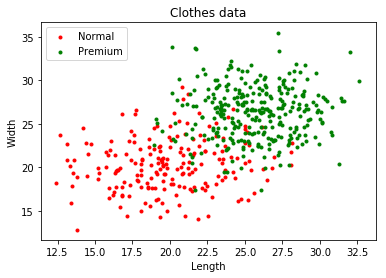

In [6]:
# Visualize the data
plt.scatter(x = X[Y == 0, 0], y = X[Y == 0, 1], color = 'red', marker = '.', label = 'Normal')
plt.scatter(x = X[Y == 1, 0], y = X[Y == 1, 1], color = 'green', marker = '.', label='Premium')
plt.title("Clothes data")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

In [7]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [8]:
# Fit the logisticss regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = random_state)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from commonfunctions import print_classification_results
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)


Confusion Matrix:
 [[121  37]
 [  9 233]]
Accuracy score: 0.885
Classification Report:
              precision    recall  f1-score   support

          0       0.93      0.77      0.84       158
          1       0.86      0.96      0.91       242

avg / total       0.89      0.89      0.88       400



In [10]:
# Predict the test results
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)

Confusion Matrix:
 [[31 11]
 [ 3 55]]
Accuracy score: 0.86
Classification Report:
              precision    recall  f1-score   support

          0       0.91      0.74      0.82        42
          1       0.83      0.95      0.89        58

avg / total       0.87      0.86      0.86       100



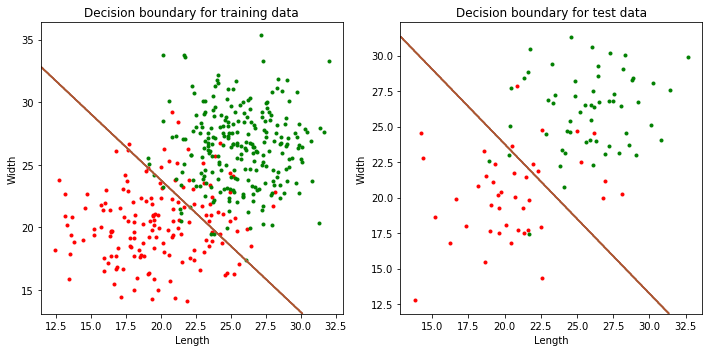

In [11]:
from commonfunctions import plot_classification_summary
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

In [12]:
# Perform the same operations with feature scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
# No reason to fit for test, because we want to use the same fit we used for training for the test as well
X_test = scaler_X.transform(X_test)
# Classification
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Training fit
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)

Confusion Matrix:
 [[136  22]
 [ 14 228]]
Accuracy score: 0.91
Classification Report:
              precision    recall  f1-score   support

          0       0.91      0.86      0.88       158
          1       0.91      0.94      0.93       242

avg / total       0.91      0.91      0.91       400



In [14]:
# Testing fit 
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)

Confusion Matrix:
 [[34  8]
 [ 5 53]]
Accuracy score: 0.87
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.81      0.84        42
          1       0.87      0.91      0.89        58

avg / total       0.87      0.87      0.87       100



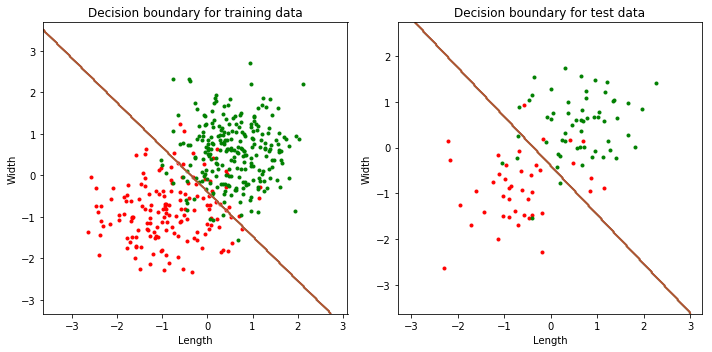

In [15]:
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)